# Importação de pacotes

In [1]:
import pandas as pd
from pycaret.regression import *

# Carregando os dados

In [29]:
# carregando os dados para o formato DataFrame
df = pd.read_csv("insurance_clean.csv", sep=";").drop(columns="charges_log")

# imprimindo as 5 primeiras linhas
df.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,children_description,smoker_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,no children,yes_not_obese
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,up to 3 children,no
2,28,male,33.000,3,no,southeast,4449.46200,1.0,obese,up to 3 children,no
3,33,male,22.705,0,no,northwest,21984.47061,1.0,normal,no children,no
4,32,male,28.880,0,no,northwest,3866.85520,1.0,overweight,no children,no


# Separando dados em treino e teste

A função `sample()` do Pandas DataFrame é usada para obter uma amostra aleatória de linhas ou colunas de um DataFrame. A função retorna um novo DataFrame que contém uma fração aleatória de linhas ou colunas do DataFrame original.

O parâmetro `frac` determina a fração de linhas que você deseja retornar em vez de um número fixo. Neste caso é usado somente 10% do dados para formar o conjunto de teste e 90% para formar os nossos dados de treino.

In [30]:
# separando os dados em teste e treino
test = df.sample(frac=0.10)
train = df.drop(test.index)

# redefinindo o index do DataFrame descartando o indice anterior (drop=True) e realizando a alteração no próprio DataFrame (inplace=True) 
test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [31]:
# verificando o formato dos conjuntos
print(f"Shape do conjunto de treino {train.shape}")
print(f"Shape do conjunto de teste {test.shape}")

Shape do conjunto de treino (1204, 11)
Shape do conjunto de teste (134, 11)


# Setup dos modelos

O método `setup()` do PyCaret é usado para preparar os dados para modelagem de aprendizado de máquina. Ele executa várias etapas de pré-processamento de dados, como:

* Separar o conjunto de dados em treinamento e teste.
* Lidar com valores ausentes e valores discrepantes (outliers).
* Codificar variáveis categóricas.
* Normalizar ou padronizar variáveis numéricas.
* Selecionar recursos (features) importantes.
* Balancear os dados.

O método `setup()` retorna um objeto contendo várias informações sobre o pré-processamento de dados que foi realizado, bem como uma pré-visualização dos dados transformados. A partir desse objeto, você pode criar, treinar e avaliar modelos de aprendizado de máquina usando o PyCaret.

In [33]:
# criando o setup do PyCaret
reg = setup(data=train,
            target="charges",
            train_size=0.7,
            preprocess=True,
            normalize=True,
            fold_strategy="kfold",
            fold=10,
            session_id=123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1204, 11)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(842, 23)"


# Métricas de regressão

Existem diversas métricas para avaliar a qualidade de modelos de regressão, mas as principais são:

## 1. Erro médio absoluto (MAE)

<center><img src="https://drive.google.com/uc?export=view&id=1kgZEOQ1nuM-rssQ5ElC2pvn1crEUfz1V" width="30%"></p></center>

É a média das diferenças absolutas entre as previsões e os valores reais. É uma métrica robusta e fácil de entender, pois ela mede o tamanho do erro em unidades da variável dependente.

**FÓRMULA:**

$$
\LARGE MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y_i}|
$$


onde:

* $n$ é o número de observações

* $y_i$ é o valor real da i-ésima observação

* $\hat{y_i}$ é o valor previsto pelo modelo para a i-ésima observação

* O símbolo $\left|  \right|$ representa o valor absoluto.

<center><img src="https://drive.google.com/uc?export=view&id=12ThAjcxkGwvqt7JUsbZ4kutHgjiUdrto" width="50%"></p></center>

**VANTAGENS:**

* Fácil interpretação: o MAE é uma métrica simples e fácil de entender, pois representa a média da diferença absoluta entre as previsões e os valores reais.
* Robustez a valores atípicos: o MAE é menos sensível a valores extremos ou outliers do que outras métricas, como o Erro Quadrático Médio (MSE).
* Proporção direta com o erro: o MAE é proporcional ao erro médio do modelo, o que significa que quanto menor o MAE, melhor é o desempenho do modelo.
* Todos os erros individuais são tratados da mesma maneira, o que pode ser uma problema para lidar com outliers.

**DESVANTAGENS:**

* Pode ignorar a direção do erro: o MAE não leva em consideração a direção do erro (ou seja, se o modelo subestima ou superestima a previsão), o que pode ser uma desvantagem em algumas aplicações em que a direção do erro é importante.
* Não é tão sensível a pequenas diferenças: o MAE pode não ser tão sensível a pequenas diferenças nas previsões, o que significa que modelos com pequenas melhorias podem não mostrar diferenças significativas no valor de MAE.

## 2. Erro quadrático médio (MSE)

É a média das diferenças quadráticas entre as previsões e os valores reais. Ela dá mais peso a erros grandes, sendo assim, é mais sensível a outliers do que o MAE. **Use esta mérica quando outliers são importantes.**



**FÓRMULA:**

$$
\LARGE MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2
$$

Onde:

* n é o número de amostras de teste;

* yi é o valor real correspondente à amostra i;

* ŷi é a previsão do modelo para a amostra i.

Quanto menor o valor do MSE, melhor é o desempenho do modelo. Isso ocorre porque o MSE penaliza erros grandes mais do que erros pequenos, devido ao fato de elevar as diferenças ao quadrado antes de calcular a média.

<center><img src="https://drive.google.com/uc?export=view&id=1RXRi0qtNmXtkXfZlTkZqhtEeP6uz0Hx6" width="50%"></p></center>

**VANTAGENS**

* Sensibilidade a valores extremos: a MSE é sensível a valores extremos, o que significa que o modelo irá penalizar previsões que estão muito longe dos valores reais. Isso pode ser uma vantagem em situações em que é importante evitar erros grandes e previsões ruins.

* Facilidade de interpretação: a MSE é uma medida fácil de ser interpretada, pois representa a média dos erros ao quadrado.

* Utilidade em otimização de modelos: a MSE pode ser usada como função objetivo em algoritmos de otimização para encontrar os melhores valores dos parâmetros do modelo.

**DESVANTAGENS**

* Pode ser influenciada por outliers: se houver muitos outliers nos dados, a MSE pode ser influenciada de forma significativa, o que pode levar a um modelo subestimado ou superestimado.

* Não é uma medida robusta: a MSE não é uma medida robusta, o que significa que ela pode ser influenciada por pequenas variações nos dados de entrada, especialmente em conjuntos de dados pequenos.

* Não leva em conta a escala dos dados: a MSE não leva em conta a escala dos dados, o que pode levar a problemas ao comparar modelos que trabalham com diferentes unidades de medida. Nesse caso, outras métricas como o Coeficiente de Determinação (R²) ou o Mean Absolute Error (MAE) podem ser mais apropriadas.

## 3. Raiz quadrada do erro quadrático médio (RMSE)

É a raiz quadrada do MSE. Ela também dá mais peso a erros grandes, mas sua interpretação é mais fácil de entender, pois ela é expressa nas mesmas unidades da variável dependente.

Um valor de RMSE menor indica que o modelo é capaz de prever com mais precisão os valores reais, enquanto um valor maior indica que o modelo tem uma precisão mais baixa.

**FÓRMULA**

$$
\LARGE MSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2}
$$

Onde:

* n é o número de amostras
* yi é o valor observado para a amostra i
* ŷi é o valor previsto pelo modelo para a amostra i

**VANTAGENS**

* O RMSE é uma medida simples e fácil de calcular, o que o torna amplamente utilizado em análises de dados e modelagem estatística.
* O RMSE é sensível a grandes erros de previsão, o que significa que ele pode ajudar a identificar áreas problemáticas em um modelo.
* O RMSE é expresso nas mesmas unidades que a variável de resposta (ou seja, a variável que estamos tentando prever), o que o torna fácil de interpretar em termos práticos.

**DESVANTAGENS**

* O RMSE pode ser sensível a outliers (valores extremos) nos dados, o que pode afetar a precisão da métrica.
* O RMSE não considera a direção dos erros de previsão (ou seja, se eles estão subestimando ou superestimando os valores reais), o que pode ser importante em algumas aplicações.
* O RMSE pode ser influenciado pelo tamanho da amostra e pela distribuição dos dados, o que pode afetar a comparabilidade entre modelos ou amostras.

**Como Interpretar o RMSE?**

O RMSE pode ser interpretado como o desvio médio que as previsões têm do alvo.
Por exemplo, imagine que você está construindo um modelo para prever o preço de casas em uma determinada região.
Se o RMSE do seu modelo é de 50.000, isso significa que, em média, o modelo está cometendo um erro de 50.000 em relação aos valores reais.
Na prática, para explicar a tomadores de decisão que não tem background técnico, eu procuro pensar que é a distância média que as previsões estarão do alvo, para cima ou para baixo, similar ao caso do intervalo de confiança.
Mas preste atenção porque isso é diferente de estabelecer um intervalo de confiança para as previsões.

**Como o RMSE é Afetado Por Outliers?**

Outliers são valores extremos que estão fora da faixa normal de um conjunto de dados.
Eles podem ter um impacto significativo no modelo, pois podem distorcer a média e, consequentemente, afetar o valor do RMSE.
Por exemplo, imagine novamente que temos um conjunto de dados de preço de casas em uma cidade.
Se tivermos 4 casas com valor de 100.000 e uma casa com valor de 2.000.000, esta última pode ter uma influência muito maior no RMSE.

Isso pode ser ilustrado da seguinte maneira (dividi os valores por 1.000 para não ficar confuso com tantos zeros):

| Valor observado | Valor previsto pelo modelo | Erro quadrado |
|-----------------|----------------------------|---------------|
| 100             | 90                         | 100           |
| 100             | 95                         | 25            |
| 100             | 95                         | 25            |
| 100             | 95                         | 25            |
| 2000            | 1000                       | 1000000       |

RMSE = raiz quadrada de (soma dos erros quadrados / número de observações)<br>
RMSE = raiz quadrada de (1000175 / 5)<br>
RMSE = raiz quadrada de 200035<br>
RMSE = 447,25<br>

Se excluirmos a casa mais cara:

RMSE = raiz quadrada de (175 / 4)<br>
RMSE = raiz quadrada de 43,75<br>
RMSE = 6,61<br>

## 4. Coeficiente de determinação (R²) --> MELHORAR

É uma medida que indica a proporção da variância da variável dependente que é explicada pelo modelo. Ele varia de 0 a 1, sendo que valores mais próximos de 1 indicam que o modelo é capaz de explicar uma grande parte da variabilidade dos dados.<br>
É raro ver R-quadrado sendo usado na prática de machine learning fora de ambientes acadêmicos com foco forte em estatística tradicional.<br>
Apesar de popular na academia, existem vários problemas com esta métrica, que foram muito bem expostos pelo professor Cosma Shalizi da Universidade Carnegie Mellon.<br><br>
Dentre as alegações contra o R-quadrado estão que ele não mede o ajuste do modelo de forma confiável e não diz nada sobre o erro de previsão

**FÓRMULA**

$$
\LARGE R^2 = 1 - \frac{SSE}{SST}
$$
ou
$$
\LARGE R^2 = 1 - \frac{\sum_{i=1}^{n}(\hat{y_i}-y_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y_i})^2}
$$

onde:

* **SSE (Sum of Squared Errors)** é a soma dos erros quadráticos residuais, que é a soma das diferenças entre os valores observados e os valores previstos pelo modelo, elevadas ao quadrado.
* **SST (Total Sum of Squares)** é a soma total dos quadrados, que é a soma das diferenças entre os valores observados e a média dos valores observados, elevadas ao quadrado.

e:

> y_hat representa a predição ou um ponto na linha de regressão <br>
> y_bar representa a média de todos os valores <br>
> y_i representa o valores atuais ou os pontos.

<center><img src="https://drive.google.com/uc?export=view&id=1uKZ4Hj5_qrooGIM-GvEWJGQYq3bOyOb8" width="30%"></p></center>


## 5. Erro percentual absoluto médio (MAPE)

É a média das diferenças percentuais absolutas entre as previsões e os valores reais. É uma medida comum em previsões financeiras, e é útil para avaliar a precisão do modelo em termos percentuais.

$$
\LARGE MAPE = \frac{1}{n}\sum_{i=1}^{n} \left|\frac{y_i - p_i}{y_i}\right|
$$

onde:

* **n** é o número total de amostras
* **y_i** é o valor real para a amostra i
* **p_i** é o valor previsto para amostra i

Um valor de MAPE baixo significa que as previsões estão próximas dos valores observados (seu modelo está acertando bem), enquanto um valor alto indica que as previsões estão longe dos valores observados (o modelo precisa ser melhorado).

# Comparando os modelos

O método `compare_models` do PyCaret é usado para comparar o desempenho de vários modelos de aprendizado de máquina em um conjunto de dados, usando uma métrica de avaliação específica.

Ao chamar o método `compare_models`, o PyCaret executa automaticamente um experimento de modelagem de aprendizado de máquina usando vários algoritmos de modelagem diferentes. Ele usa um método de validação cruzada para treinar e avaliar cada modelo, dividindo o conjunto de dados em vários subconjuntos e avaliando o desempenho do modelo em cada subconjunto.

O resultado do `compare_models` é uma tabela de classificação de desempenho dos modelos, ordenados pela métrica de avaliação escolhida.

O método `compare_models` nos retorna o modelo que melhor performou entre todos os testados usando como indicador a métrica `RMSE`.

Neste caso, o modelo vencedor foi o Lasso Least Angle Regression com um RMSE de 4478.47.

In [34]:
best = compare_models(round=2, sort="RMSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,2458.77,20348832.46,4478.47,0.85,0.43,0.28,0.00
lasso,Lasso Regression,2448.35,20416489.60,4485.96,0.85,0.43,0.27,0.18
ridge,Ridge Regression,2458.30,20418317.50,4486.15,0.85,0.44,0.27,0.00
br,Bayesian Ridge,2454.23,20419124.62,4486.23,0.85,0.43,0.27,0.00
lr,Linear Regression,2449.22,20423014.30,4486.59,0.85,0.42,0.27,0.47
lar,Least Angle Regression,2528.60,21261228.75,4567.78,0.85,0.43,0.28,0.00
huber,Huber Regressor,1831.65,21314924.99,4581.70,0.84,0.42,0.14,0.01
par,Passive Aggressive Regressor,1819.81,21553013.19,4608.25,0.84,0.44,0.13,0.01
gbr,Gradient Boosting Regressor,2560.68,22911524.88,4755.08,0.84,0.46,0.32,0.02
lightgbm,Light Gradient Boosting Machine,2826.93,23599731.49,4838.46,0.83,0.54,0.37,0.01


In [35]:
print(best)

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=123, verbose=False)


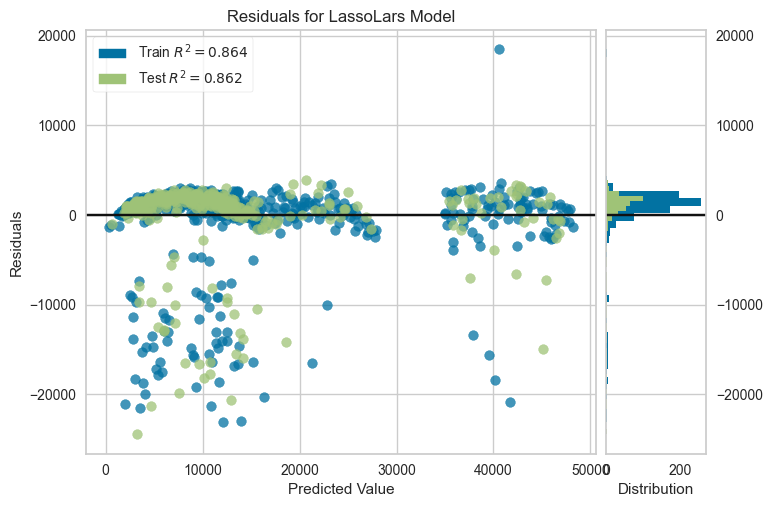

In [36]:
plot_model(best, plot = 'residuals')

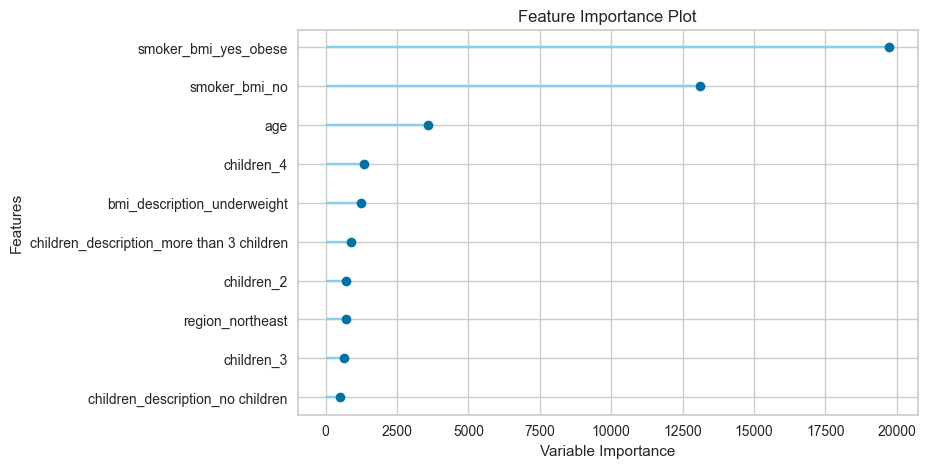

In [37]:
plot_model(best, plot = 'feature')

# Referências

* https://garba.org/posts/2022/scoring_regression/#regression-evaluation-metrics
* https://mariofilho.com/rmse-raiz-do-erro-quadratico-medio-em-machine-learning/
* https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/
* https://vitalflux.com/r-squared-explained-machine-learning/
* https://mariofilho.com/mape-erro-absoluto-percentual-medio-em-machine-learning/
